In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import mean_squared_error
import gc

In [2]:
means = np.load("meanss.npy")
mins = np.load("minss.npy")
maxs = np.load("maxss.npy")

In [4]:
h1 = np.load("h1.npy")
h2 = np.load("h2.npy")
h3 = np.load("h3.npy")
h4 = np.load("h4.npy")
h5 = np.load("h5.npy")


In [5]:
ll_test = np.load("ll_test.npy")
ll_train = np.load("ll_train.npy")
p_test = np.load("p_test.npy")
p_train = np.load("p_train.npy")
pred = np.load("pred.npy")
time_test = np.load("time_test.npy")


In [6]:
y_pre_mlp_yh = np.load("y_pre_mlp_yh.npy")
y_pre_RF_ch = np.load("y_pre_RF_ch.npy")
y_pre_svm_yh = np.load("y_pre_svm_yh.npy")
y_pred_lstm = np.load("y_pred_lstm.npy")
yy_test = np.load("yy_test.npy")
yy_train = np.load("yy_train.npy")


In [15]:
x0 = np.arange(0, 11, 1)  # 从 0 到 10，每个间隔 1
y0 = x0

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from sklearn.metrics import r2_score

In [68]:
print("mean_absolute_error:", mean_absolute_error(yy_test, y_pred_lstm))
print("mean_squared_error:", mean_squared_error(yy_test, y_pred_lstm))
print("rmse:", sqrt(mean_squared_error(yy_test, y_pred_lstm)))
print("r2 score:", r2_score(yy_test, y_pred_lstm))

mean_absolute_error: 0.5777667657148958
mean_squared_error: 0.5860115428547777
rmse: 0.7655139076821386
r2 score: 0.5670176044334958


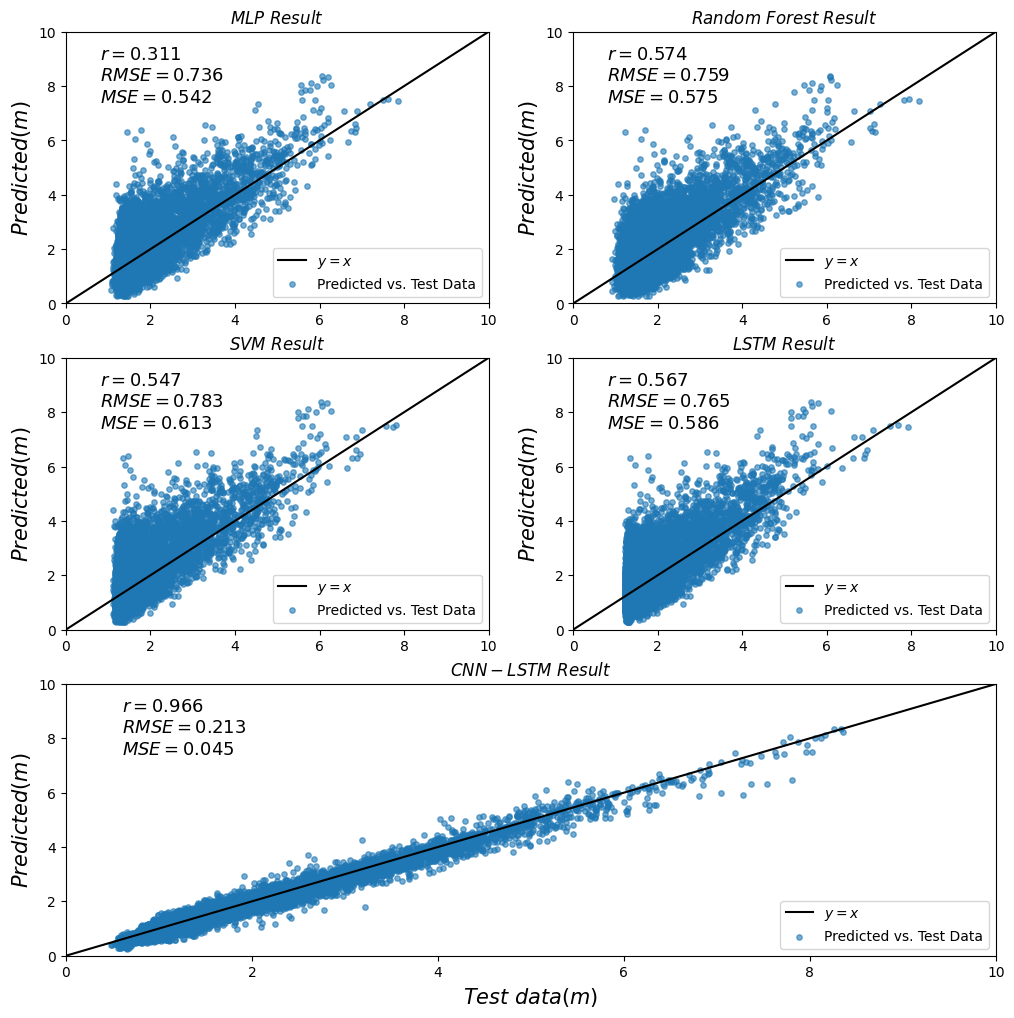

In [74]:
plt.figure(num=1,figsize = (12,12), facecolor=None)
plt.subplot(321)
plt.plot(x0,y0,'k', label='$y=x$')
plt.scatter(y_pre_mlp_yh,yy_test,s=15,alpha=0.6,label='Predicted vs. Test Data')
plt.title('$MLP\ Result$')
plt.text(0.8,9,r'$r=0.311$',fontsize=13)
plt.text(0.8,8.2,r'$RMSE=0.736$',fontsize=13)
plt.text(0.8,7.4,r'$MSE=0.542$',fontsize=13)

plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='lower right')

# plt.xlabel('$Test data(m)$', fontsize=15) 
plt.ylabel('$Predicted(m)$', fontsize=15)

plt.subplot(322)
plt.plot(x0,y0,'k', label='$y=x$')
plt.scatter(y_pre_RF_ch,yy_test,s=15,alpha=0.6,label='Predicted vs. Test Data')
plt.title('$Random\ Forest\ Result$')
plt.text(0.8,9,r'$r=0.574$',fontsize=13)
plt.text(0.8,8.2,r'$RMSE=0.759$',fontsize=13)
plt.text(0.8,7.4,r'$MSE=0.575$',fontsize=13)

plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='lower right')

# plt.xlabel('$Test\ data(m)$', fontsize=15) 
plt.ylabel('$Predicted(m)$', fontsize=15)



plt.subplot(323)
plt.plot(x0,y0,'k', label='$y=x$')
plt.scatter(y_pre_svm_yh,yy_test,s=15,alpha=0.6,label='Predicted vs. Test Data')
plt.title('$SVM\ Result$')
plt.text(0.8,9,r'$r=0.547$',fontsize=13)
plt.text(0.8,8.2,r'$RMSE=0.783$',fontsize=13)
plt.text(0.8,7.4,r'$MSE=0.613$',fontsize=13)

plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='lower right')

# plt.xlabel('$Test\ data(m)$', fontsize=15) 
plt.ylabel('$Predicted(m)$', fontsize=15)



plt.subplot(324)

plt.plot(x0,y0,'k', label='$y=x$')
plt.scatter(y_pred_lstm,yy_test,s=15,alpha=0.6,label='Predicted vs. Test Data')
plt.title('$LSTM\ Result$')
plt.text(0.8,9,r'$r=0.567$',fontsize=13)
plt.text(0.8,8.2,r'$RMSE=0.765$',fontsize=13)
plt.text(0.8,7.4,r'$MSE=0.586$',fontsize=13)

plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='lower right')

# plt.xlabel('$Test\ data(m)$', fontsize=15) 
plt.ylabel('$Predicted(m)$', fontsize=15)


plt.subplot(3,2, (5, 6))
plt.plot(x0,y0,'k', label='$y=x$')
plt.scatter(pred,yy_test,s=15,alpha=0.6,label='Predicted vs. Test Data')
plt.text(0.6,9,r'$r=0.966$',fontsize=13)
plt.text(0.6,8.2,r'$RMSE=0.213$',fontsize=13)
plt.text(0.6,7.4,r'$MSE=0.045$',fontsize=13)

plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='lower right')

plt.title('$CNN-LSTM\ Result$')
plt.xlabel('$Test\ data(m)$', fontsize=15) 
plt.ylabel('$Predicted(m)$', fontsize=15)

plt.savefig('Figure/figure5.png',dpi=500,bbox_inches='tight')

# Figure6

## first month error

In [247]:
print("mean_absolute_error:", mean_absolute_error(yy_test[:2000], y_pre_mlp_yh[:2000]))
print("mean_squared_error:", mean_squared_error(yy_test[:2000], y_pre_mlp_yh[:2000]))
print("rmse:", sqrt(mean_squared_error(yy_test[:2000], y_pre_mlp_yh[:2000])))
print("r2 score:", r2_score(yy_test[:2000], y_pre_mlp_yh[:2000]))

mean_absolute_error: 0.6459973494363966
mean_squared_error: 0.7569085829251041
rmse: 0.8700049327015934
r2 score: 0.6524670167218284


In [242]:
print("mean_absolute_error:", mean_absolute_error(yy_test[8510:], y_pre_mlp_yh[8510:]))
print("mean_squared_error:", mean_squared_error(yy_test[8510:], y_pre_mlp_yh[8510:]))
print("rmse:", sqrt(mean_squared_error(yy_test[8510:], y_pre_mlp_yh[8510:])))
print("r2 score:", r2_score(yy_test[8510:], y_pre_mlp_yh[8510:]))

mean_absolute_error: 0.6906653916571787
mean_squared_error: 0.7186732112527905
rmse: 0.8477459591486063
r2 score: 0.11250248545863173


In [256]:
print("mean_absolute_error:", mean_absolute_error(yy_test[:2000], y_pre_svm_yh[:2000]))
print("mean_squared_error:", mean_squared_error(yy_test[:2000], y_pre_svm_yh[:2000]))
print("rmse:", sqrt(mean_squared_error(yy_test[:2000], y_pre_svm_yh[:2000])))
print("r2 score:", r2_score(yy_test[:2000], y_pre_svm_yh[:2000]))

mean_absolute_error: 0.6574577192314184
mean_squared_error: 0.838474042965147
rmse: 0.9156822827625022
r2 score: 0.615016407362075


In [258]:
print("mean_absolute_error:", mean_absolute_error(yy_test[8510:], y_pre_svm_yh[8510:]))
print("mean_squared_error:", mean_squared_error(yy_test[8510:], y_pre_svm_yh[8510:]))
print("rmse:", sqrt(mean_squared_error(yy_test[8510:], y_pre_svm_yh[8510:])))
print("r2 score:", r2_score(yy_test[8510:], y_pre_svm_yh[8510:]))

mean_absolute_error: 0.7292133366513662
mean_squared_error: 0.8026300808433816
rmse: 0.8958962444632647
r2 score: 0.008823216600905681


In [260]:
print("mean_absolute_error:", mean_absolute_error(yy_test[:2000], y_pre_RF_ch[:2000]))
print("mean_squared_error:", mean_squared_error(yy_test[:2000], y_pre_RF_ch[:2000]))
print("rmse:", sqrt(mean_squared_error(yy_test[:2000], y_pre_RF_ch[:2000])))
print("r2 score:", r2_score(yy_test[:2000], y_pre_RF_ch[:2000]))

mean_absolute_error: 0.6605217680533562
mean_squared_error: 0.7918895084416584
rmse: 0.8898817384583517
r2 score: 0.6364055983724443


In [261]:
print("mean_absolute_error:", mean_absolute_error(yy_test[8510:], y_pre_RF_ch[8510:]))
print("mean_squared_error:", mean_squared_error(yy_test[8510:], y_pre_RF_ch[8510:]))
print("rmse:", sqrt(mean_squared_error(yy_test[8510:], y_pre_RF_ch[8510:])))
print("r2 score:", r2_score(yy_test[8510:], y_pre_RF_ch[8510:]))

mean_absolute_error: 0.6801321662143976
mean_squared_error: 0.7023189026614626
rmse: 0.8380446901338034
r2 score: 0.13269860241357512


In [263]:

print("mean_absolute_error:", mean_absolute_error(yy_test[:2000], y_pred_lstm[:2000]))
print("mean_squared_error:", mean_squared_error(yy_test[:2000], y_pred_lstm[:2000]))
print("rmse:", sqrt(mean_squared_error(yy_test[:2000], y_pred_lstm[:2000])))
print("r2 score:", r2_score(yy_test[:2000], y_pred_lstm[:2000]))

mean_absolute_error: 0.6584081840103801
mean_squared_error: 0.8098325736623914
rmse: 0.8999069805609863
r2 score: 0.6281670777294128


In [264]:
print("mean_absolute_error:", mean_absolute_error(yy_test[8510:], y_pred_lstm[8510:]))
print("mean_squared_error:", mean_squared_error(yy_test[8510:], y_pred_lstm[8510:]))
print("rmse:", sqrt(mean_squared_error(yy_test[8510:], y_pred_lstm[8510:])))
print("r2 score:", r2_score(yy_test[8510:], y_pred_lstm[8510:]))

mean_absolute_error: 0.7048517463416781
mean_squared_error: 0.7630353904862871
rmse: 0.8735189697346516
r2 score: 0.057719138600975994


In [266]:

print("mean_absolute_error:", mean_absolute_error(yy_test[:2000], pred[:2000]))
print("mean_squared_error:", mean_squared_error(yy_test[:2000], pred[:2000]))
print("rmse:", sqrt(mean_squared_error(yy_test[:2000], pred[:2000])))
print("r2 score:", r2_score(yy_test[:2000], pred[:2000]))

mean_absolute_error: 0.18003293111563348
mean_squared_error: 0.05953626474271543
rmse: 0.2440005425049613
r2 score: 0.9726640493105331


In [267]:
print("mean_absolute_error:", mean_absolute_error(yy_test[8510:], pred[8510:]))
print("mean_squared_error:", mean_squared_error(yy_test[8510:], pred[8510:]))
print("rmse:", sqrt(mean_squared_error(yy_test[8510:], pred[8510:])))
print("r2 score:", r2_score(yy_test[8510:], pred[8510:]))

mean_absolute_error: 0.19970246381933698
mean_squared_error: 0.0642995195979297
rmse: 0.25357349939993673
r2 score: 0.9205958105355148


## figure

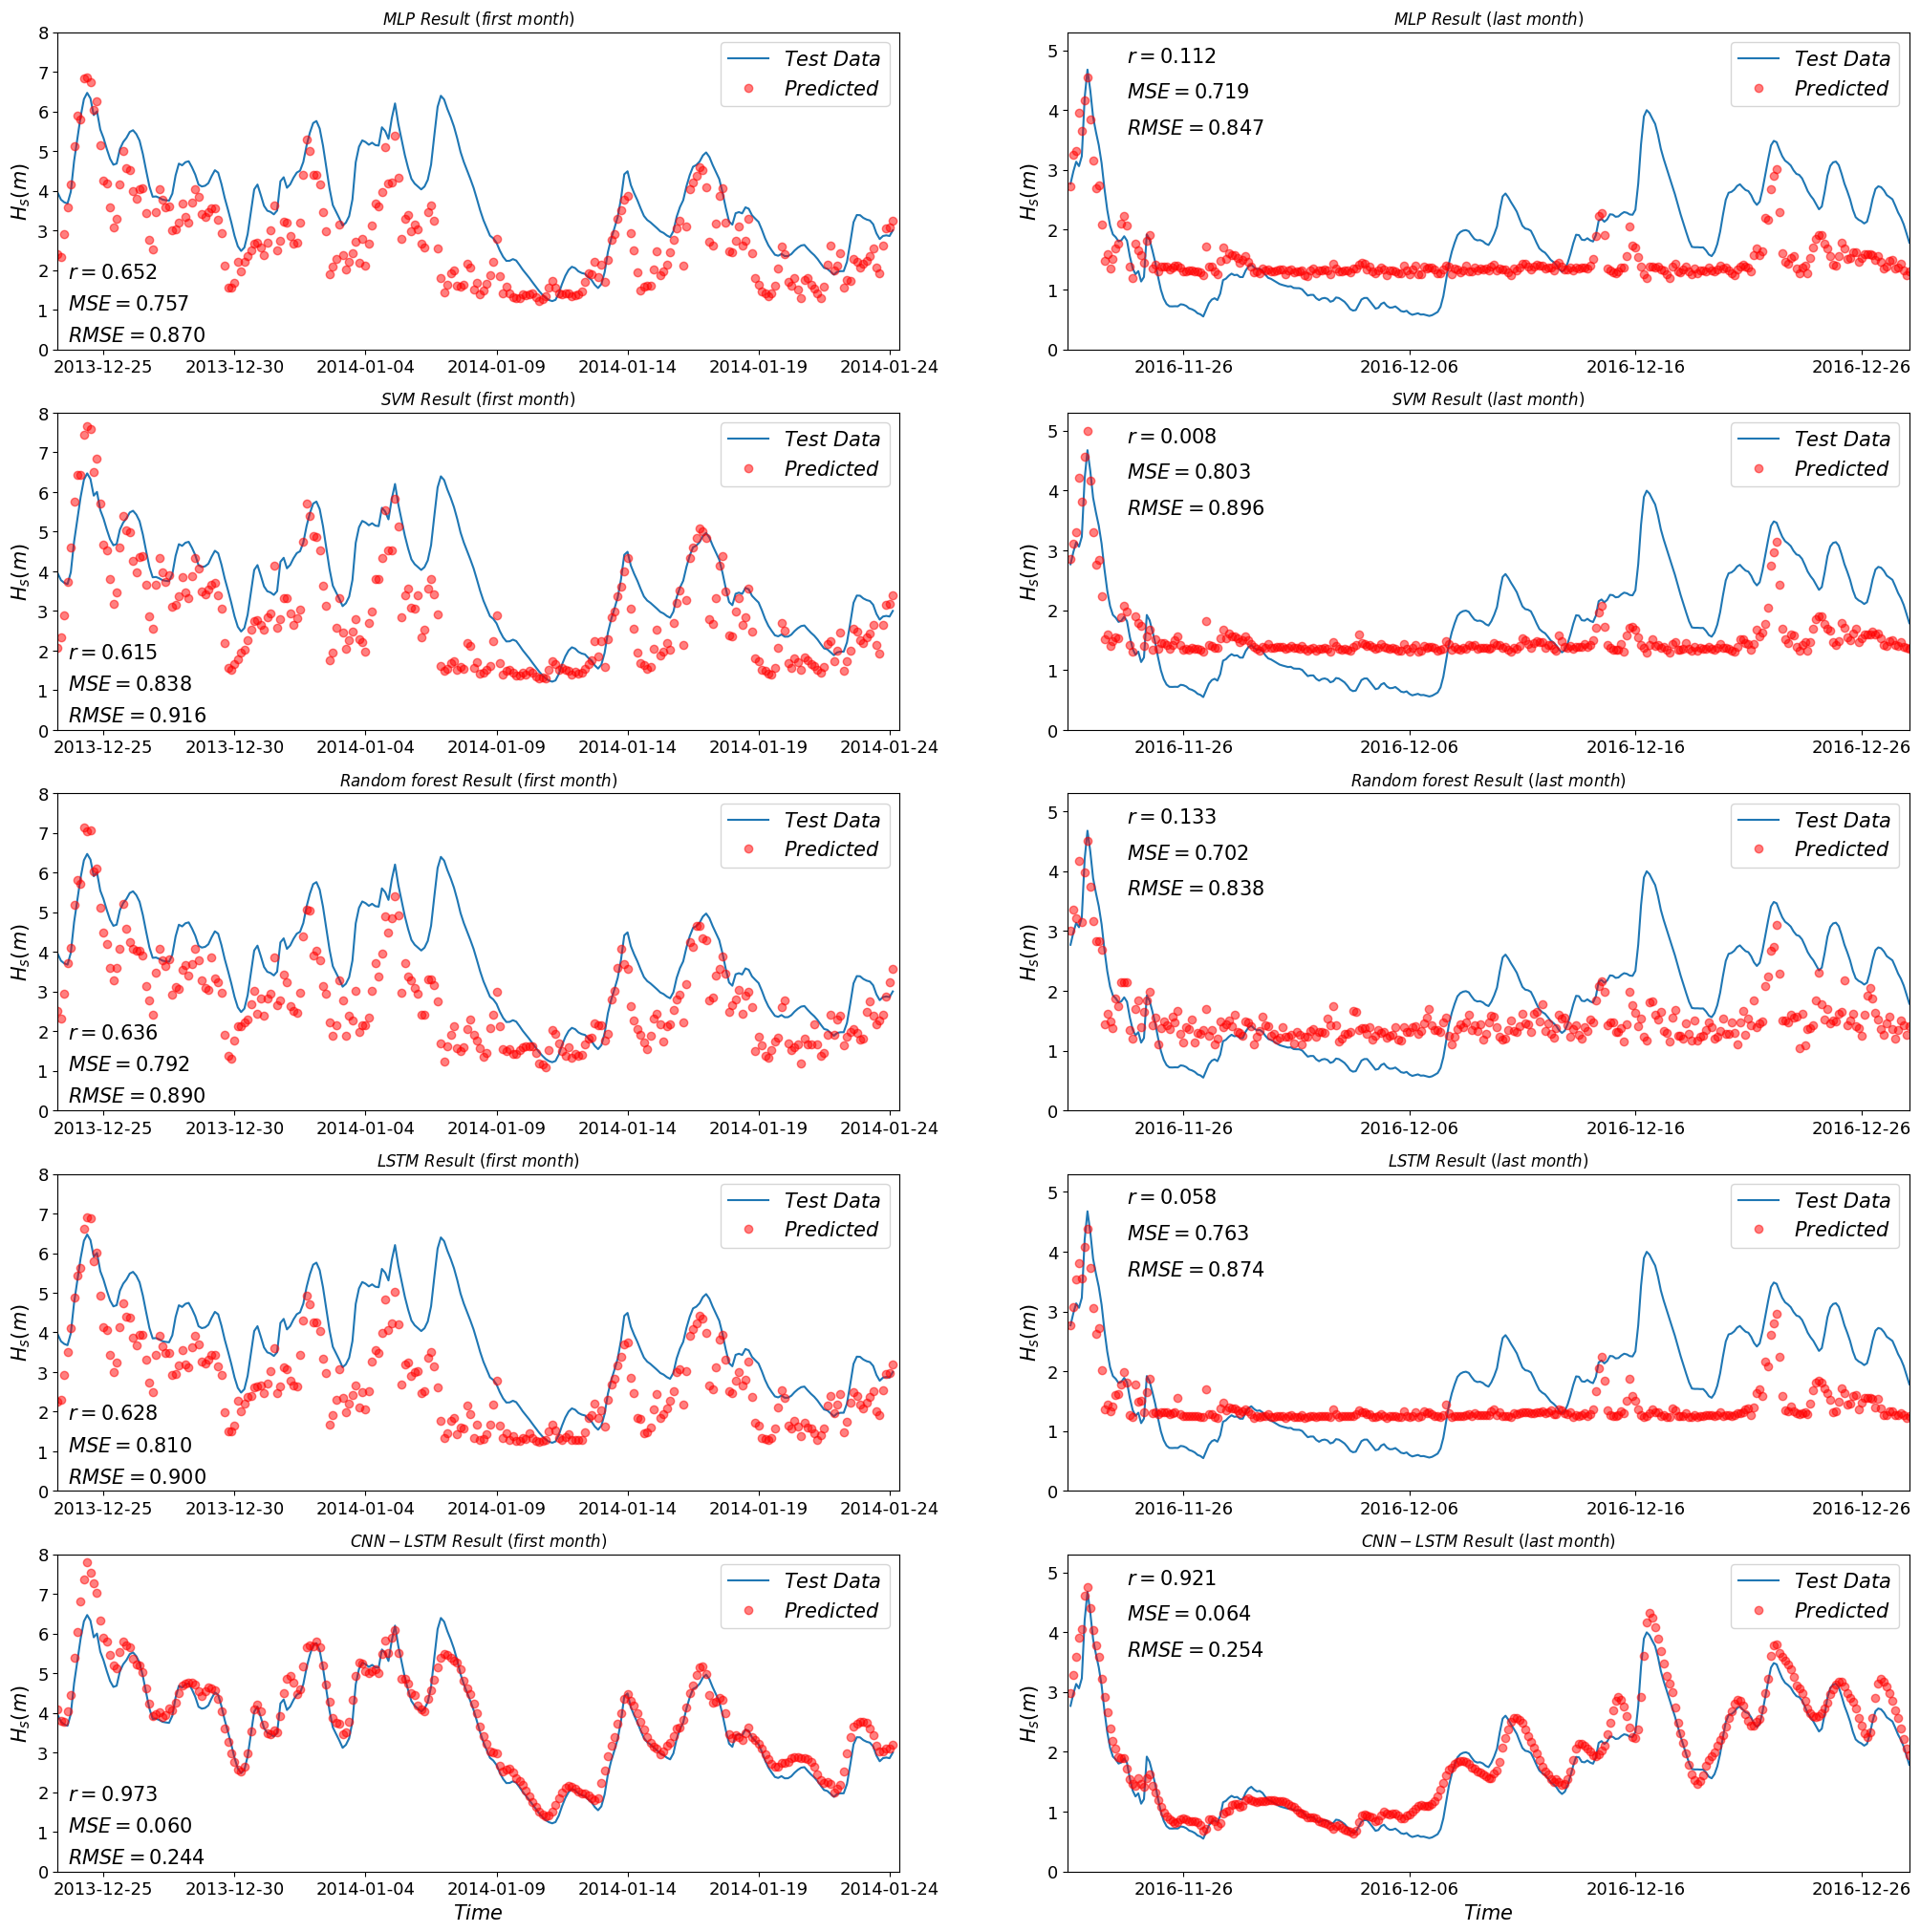

In [272]:
plt.figure(num=2,figsize = (25,25), facecolor=None)
plt.subplot(521)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], y_pre_mlp_yh[:256],'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$MLP\ Result\ (first\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.xlim(time_test[0],time_test[257])
plt.ylim(0,8)
plt.yticks(fontsize=13)

plt.text(time_test[3],1.8,r'$r=0.652$',fontsize=15)
plt.text(time_test[3],1,r'$MSE=0.757$',fontsize=15)
plt.text(time_test[3],0.2,r'$RMSE=0.870$',fontsize=15)





plt.subplot(522)
plt.plot(time_test[8510:], yy_test[8510:], label='$Test\ Data$')
plt.plot(time_test[8510:], y_pre_mlp_yh[8510:],'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$MLP\ Result\ (last\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[8510+40],time_test[8510+40*3],time_test[8510+40*5],time_test[8510+40*7]],
           ['2016-11-26','2016-12-06','2016-12-16','2016-12-26'],rotation=0,fontsize=13)# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.xlim(time_test[8510-1],time_test[-1])
plt.ylim(0,5.3)
plt.yticks(fontsize=13)
plt.text(time_test[8530],4.8,r'$r=0.112$',fontsize=15)
plt.text(time_test[8530],4.2,r'$MSE=0.719$',fontsize=15)
plt.text(time_test[8530],3.6,r'$RMSE=0.847$',fontsize=15)





plt.subplot(523)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], y_pre_svm_yh[:256]*1.1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$SVM\ Result\ (first\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,8)
plt.xlim(time_test[0],time_test[257])
plt.yticks(fontsize=13)
plt.text(time_test[3],1.8,r'$r=0.615$',fontsize=15)
plt.text(time_test[3],1,r'$MSE=0.838$',fontsize=15)
plt.text(time_test[3],0.2,r'$RMSE=0.916$',fontsize=15)





plt.subplot(524)
plt.plot(time_test[8510:], yy_test[8510:], label='$Test\ Data$')
plt.plot(time_test[8510:], y_pre_svm_yh[8510:]*1.1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$SVM\ Result\ (last\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[8510+40],time_test[8510+40*3],time_test[8510+40*5],time_test[8510+40*7]],
           ['2016-11-26','2016-12-06','2016-12-16','2016-12-26'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,5.3)
plt.xlim(time_test[8510-1],time_test[-1])
plt.yticks(fontsize=13)
plt.text(time_test[8530],4.8,r'$r=0.008$',fontsize=15)
plt.text(time_test[8530],4.2,r'$MSE=0.803$',fontsize=15)
plt.text(time_test[8530],3.6,r'$RMSE=0.896$',fontsize=15)




plt.subplot(525)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], y_pre_RF_ch[:256]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$Random\ forest\ Result\ (first\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,8)
plt.xlim(time_test[0],time_test[257])
plt.yticks(fontsize=13)
plt.text(time_test[3],1.8,r'$r=0.636$',fontsize=15)
plt.text(time_test[3],1,r'$MSE=0.792$',fontsize=15)
plt.text(time_test[3],0.2,r'$RMSE=0.890$',fontsize=15)




plt.subplot(526)
plt.plot(time_test[8510:], yy_test[8510:], label='$Test\ Data$')
plt.plot(time_test[8510:], y_pre_RF_ch[8510:]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$Random\ forest\ Result\ (last\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[8510+40],time_test[8510+40*3],time_test[8510+40*5],time_test[8510+40*7]],
           ['2016-11-26','2016-12-06','2016-12-16','2016-12-26'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,5.3)
plt.xlim(time_test[8510-1],time_test[-1])
plt.yticks(fontsize=13)
plt.text(time_test[8530],4.8,r'$r=0.133$',fontsize=15)
plt.text(time_test[8530],4.2,r'$MSE=0.702$',fontsize=15)
plt.text(time_test[8530],3.6,r'$RMSE=0.838$',fontsize=15)



plt.subplot(527)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], y_pred_lstm[:256]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$LSTM\ Result\ (first\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,8)
plt.xlim(time_test[0],time_test[257])
plt.yticks(fontsize=13)
plt.text(time_test[3],1.8,r'$r=0.628$',fontsize=15)
plt.text(time_test[3],1,r'$MSE=0.810$',fontsize=15)
plt.text(time_test[3],0.2,r'$RMSE=0.900$',fontsize=15)





plt.subplot(528)
plt.plot(time_test[8510:], yy_test[8510:], label='$Test\ Data$')
plt.plot(time_test[8510:], y_pred_lstm[8510:]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$LSTM\ Result\ (last\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[8510+40],time_test[8510+40*3],time_test[8510+40*5],time_test[8510+40*7]],
           ['2016-11-26','2016-12-06','2016-12-16','2016-12-26'],rotation=0,fontsize=13)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,5.3)
plt.xlim(time_test[8510-1],time_test[-1])
plt.yticks(fontsize=13)
plt.text(time_test[8530],4.8,r'$r=0.058$',fontsize=15)
plt.text(time_test[8530],4.2,r'$MSE=0.763$',fontsize=15)
plt.text(time_test[8530],3.6,r'$RMSE=0.874$',fontsize=15)




plt.subplot(529)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], pred[:256]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$CNN-LSTM\ Result\ (first\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0,fontsize=13)
plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,8,)
plt.xlim(time_test[0],time_test[257])
plt.yticks(fontsize=13)
plt.text(time_test[3],1.8,r'$r=0.973$',fontsize=15)
plt.text(time_test[3],1,r'$MSE=0.060$',fontsize=15)
plt.text(time_test[3],0.2,r'$RMSE=0.244$',fontsize=15)





plt.subplot(5,2,10)
plt.plot(time_test[8510:], yy_test[8510:], label='$Test\ Data$')
plt.plot(time_test[8510:], pred[8510:]*1,'o', alpha=0.5, label='$Predicted$',  color="r")
plt.title('$CNN-LSTM\ Result\ (last\ month)$')

plt.legend(loc='upper right', fontsize=15)
plt.xticks([time_test[8510+40],time_test[8510+40*3],time_test[8510+40*5],time_test[8510+40*7]],
           ['2016-11-26','2016-12-06','2016-12-16','2016-12-26'],rotation=0,fontsize=13)
plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,5.3)
plt.xlim(time_test[8510-1],time_test[-1])
plt.yticks(fontsize=13)
plt.text(time_test[8530],4.8,r'$r=0.921$',fontsize=15)
plt.text(time_test[8530],4.2,r'$MSE=0.064$',fontsize=15)
plt.text(time_test[8530],3.6,r'$RMSE=0.254$',fontsize=15)


plt.savefig('Figure/figure6.png',dpi=500,bbox_inches='tight')

In [182]:
pred.shape

(8808, 1)

(0.0, 8.0)

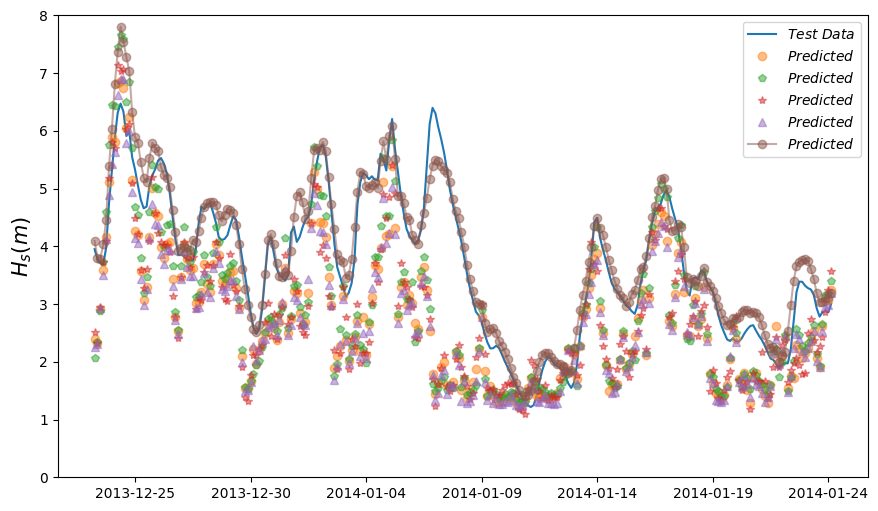

In [201]:
plt.figure(num=2,figsize = (23,6), facecolor=None)

plt.subplot(121)
plt.plot(time_test[:256], yy_test[:256], label='$Test\ Data$')
plt.plot(time_test[:256], y_pre_mlp_yh[:256],'o', alpha=0.5, label='$Predicted$',  )
plt.plot(time_test[:256], y_pre_svm_yh[:256]*1.1,'p',alpha=0.5, label='$Predicted$',  )
plt.plot(time_test[:256], y_pre_RF_ch[:256]*1,'*', alpha=0.5, label='$Predicted$', )
plt.plot(time_test[:256], y_pred_lstm[:256]*1, '^',alpha=0.5, label='$Predicted$', )
plt.plot(time_test[:256], pred[:256]*1,'o-', alpha=0.5, label='$Predicted$')



# plt.title('$MLP\ Result\ (first\ month)$')

plt.legend(loc='upper right')
plt.xticks([time_test[14],time_test[54],time_test[94],time_test[134],time_test[174],time_test[214],time_test[254]],
           ['2013-12-25','2013-12-30','2014-01-04','2014-01-09','2014-01-14','2014-01-19','2014-01-24'],rotation=0)
# plt.xlabel('$Time$', fontsize=15) 
plt.ylabel('$H_s(m)$', fontsize=15)
plt.ylim(0,8)







